In [1]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 29.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=4306497744d3ded3e20208f37859d1fe09134c3994dc186548ae4e7cfa7f76af
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import wandb
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

In [3]:
run = wandb.init(project="Animal")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
config = wandb.config

In [5]:
wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models"),
]

In [9]:

dataset_path = "/content/drive/MyDrive/Data/animal"
width = height = 224

idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

data_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="training",
    target_size = (224,224)
)

data_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size = (224,224)

)


Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


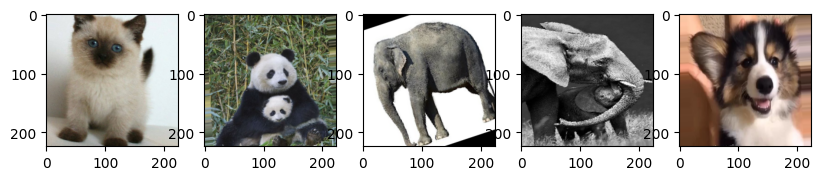

In [8]:
some_images=next(data_train)
X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(16,16))
for i in range(5):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])


In [10]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(width,height,3),
    pooling='avg'
)

9406464/9406464 [==============================] - 0s 0us/step


In [11]:
for layer in base_model.layers[0:-4]:
  layer.trainable = False

In [12]:

my_model = tf.keras.models.Sequential([
    base_model,
    layers.Dropout(0.2),
    layers.Dense(5,activation='softmax'),
])

In [13]:

my_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)


In [14]:
plt_model = my_model.fit(data_train, validation_data=data_validation,callbacks=wandb_callbacks, epochs=20)

Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: 0.3006 - accuracy: 0.9021

wandb: Adding directory to artifact (./models)... Done. 0.0s


33/33 [==============================] - 332s 10s/step - loss: 0.3006 - accuracy: 0.9021 - val_loss: 0.0838 - val_accuracy: 0.9805
Epoch 2/20
33/33 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9779

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 52s 2s/step - loss: 0.0545 - accuracy: 0.9779 - val_loss: 0.0530 - val_accuracy: 0.9805
Epoch 3/20
33/33 [==============================] - ETA: 0s - loss: 0.0277 - accuracy: 0.9914

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 48s 1s/step - loss: 0.0277 - accuracy: 0.9914 - val_loss: 0.0837 - val_accuracy: 0.9805
Epoch 4/20
33/33 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9875

wandb: Adding directory to artifact (./models)... Done. 0.0s


33/33 [==============================] - 47s 1s/step - loss: 0.0309 - accuracy: 0.9875 - val_loss: 0.1060 - val_accuracy: 0.9650
Epoch 5/20
33/33 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9894

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 49s 1s/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0533 - val_accuracy: 0.9922
Epoch 6/20
33/33 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 0.9914

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 46s 1s/step - loss: 0.0298 - accuracy: 0.9914 - val_loss: 0.0619 - val_accuracy: 0.9805
Epoch 7/20
33/33 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9933

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 47s 1s/step - loss: 0.0237 - accuracy: 0.9933 - val_loss: 0.1108 - val_accuracy: 0.9650
Epoch 8/20
33/33 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9971

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 52s 2s/step - loss: 0.0173 - accuracy: 0.9971 - val_loss: 0.0652 - val_accuracy: 0.9767
Epoch 9/20
33/33 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9952

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 48s 1s/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0498 - val_accuracy: 0.9805
Epoch 10/20
33/33 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9962

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 48s 1s/step - loss: 0.0087 - accuracy: 0.9962 - val_loss: 0.1051 - val_accuracy: 0.9611
Epoch 11/20
33/33 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9971

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 49s 1s/step - loss: 0.0076 - accuracy: 0.9971 - val_loss: 0.0850 - val_accuracy: 0.9767
Epoch 12/20
33/33 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9952

wandb: Adding directory to artifact (./models)... Done. 0.0s


33/33 [==============================] - 47s 1s/step - loss: 0.0126 - accuracy: 0.9952 - val_loss: 0.0703 - val_accuracy: 0.9805
Epoch 13/20
33/33 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9971

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 47s 1s/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.0431 - val_accuracy: 0.9728
Epoch 14/20
33/33 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9962

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 47s 1s/step - loss: 0.0073 - accuracy: 0.9962 - val_loss: 0.0480 - val_accuracy: 0.9805
Epoch 15/20
33/33 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9990

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 47s 1s/step - loss: 0.0083 - accuracy: 0.9990 - val_loss: 0.0363 - val_accuracy: 0.9844
Epoch 16/20
33/33 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9942

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 48s 1s/step - loss: 0.0163 - accuracy: 0.9942 - val_loss: 0.0638 - val_accuracy: 0.9883
Epoch 17/20
33/33 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9962

wandb: Adding directory to artifact (./models)... Done. 0.0s


33/33 [==============================] - 47s 1s/step - loss: 0.0171 - accuracy: 0.9962 - val_loss: 0.0746 - val_accuracy: 0.9650
Epoch 18/20
33/33 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9962

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 47s 1s/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0673 - val_accuracy: 0.9767
Epoch 19/20
33/33 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9981

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 47s 1s/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0466 - val_accuracy: 0.9805
Epoch 20/20
33/33 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9971

wandb: Adding directory to artifact (./models)... Done. 0.1s


33/33 [==============================] - 48s 1s/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.0451 - val_accuracy: 0.9844


In [15]:
my_model.save("5_Animals_v2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
